## Введение в Pandas 10 модуль

→ Pandas является наиболее продвинутой и быстроразвивающейся библиотекой для анализа данных и их предобработки.

Series — это упорядоченная изменяемая коллекция объектов, имеющая так называемые ассоциативные метки (индексы).

→ Series в какой-то степени является единицей хранения информации в Pandas. Её можно рассматривать как именованный столбец таблицы с индексами строк.

→ Для создания объекта Series используется команда pd.Series().



In [3]:
import pandas as pd

# Способ 1 — из списка с использованием параметров функции pd.Series():
countries = pd.Series(
    data = ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ'],
    name = 'countries'
)
display(countries)


# Способ 2 — из словаря, в котором ключами являются будущие метки, а значениями — будущие значения Series, при этом использование параметра name также возможно:
countries = pd.Series({
    'UK': 'Англия',
    'CA': 'Канада',
    'US' : 'США',
    'RU': 'Россия',
    'UA': 'Украина',
    'BY': 'Беларусь',
    'KZ': 'Казахстан'},
    name = 'countries'
)
display(countries)

UK       Англия
CA       Канада
US          США
RU       Россия
UA      Украина
BY     Беларусь
KZ    Казахстан
Name: countries, dtype: object

UK       Англия
CA       Канада
US          США
RU       Россия
UA      Украина
BY     Беларусь
KZ    Казахстан
Name: countries, dtype: object

### Доступ к данным в Series

Доступ к элементам осуществляется с использованием loc или iloc.



In [ ]:
"""".loc вызывается с квадратными скобками, в которые передаются метки. 
В него можно передать как один индекс, так и список, чтобы получилось несколько элементов.
Например, для получения названия страны по коду "US" можно выполнить следующий код:"""
print(countries.loc['US'])

"""Для того чтобы достать информацию по нескольким индексам, необходимо обернуть интересующие индексы в список:"""
print(countries.loc[['US', 'RU', 'UK']])



""".iloc также вызывается с квадратными скобками и принимает на вход порядковые номера элементов Series (нумерация начинаются с 0).
В него можно так же передавать как один индекс, так и диапазон чисел. 
Например, для получения элемента по индексу "KZ" нужно обратиться через .iloc по номеру 6:"""
print(countries.iloc[6])
# Казахстан

print(countries.iloc[1:4])

На самом деле loc и iloc можно опустить и обращаться к элементам Series напрямую по индексам, например countries[['UK', 'US', 'UA']] или countries[[0, 2, 4]]. Оба варианта являются равноправными для Series, однако в дальнейшем мы будем использовать эти операции при обращении к более сложной структуре — DataFrame, а в контексте этой структуры эти варианты уже неравноправны.

In [8]:
names = ['chlorhexidine', 'cyntomycin', 'afobazol'] 
counts = [15, 18, 7]

def create_medications(names, counts):
    """
    Создает Series, где индексами являются названия лекарств,
    а значениями - количество единиц товара.
    """
    return pd.Series(counts, index=names)

def get_percent(medications, name):
    """
    Возвращает долю количества товара с именем name от общего количества
    товаров в поставке в процентах.
    """
    total = medications.sum()
    if name in medications:
        return (medications[name] / total) * 100
    return 0  # если лекарства нет в списке, возвращаем 0%
    
    

chlorhexidine    15
cyntomycin       18
afobazol          7
dtype: int64

## DataFrame как структура данных

Самый простой способ создания DataFrame — из словаря, ключами которого являются имена столбцов будущей таблицы, а значениями — списки, в которых хранится содержимое этих столбцов:

In [9]:
countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'area': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})

Обратите внимание, что, так как мы не задали метки (индексы) DataFrame, они были сгенерированы автоматически. Исправим это, задав индексы вручную:

In [10]:
countries_df.index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
display(countries_df)

,country,population,area
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,146.24,17125191
UA,Украина,45.50,603628
BY,Беларусь,9.50,207600
KZ,Казахстан,17.04,2724902


Также DataFrame можно создать из вложенного списка, внутренние списки которого будут являться строками новой таблицы:

В данном варианте создания DataFrame мы задаём имена столбцов в списке с помощью параметра columns, а также инициализируем параметр index для задания меток стран.

In [14]:
countries_df = pd.DataFrame(
    data = [
        ['Англия', 56.29, 133396],
        ['Канада', 38.05, 9984670],
        ['США', 322.28, 9826630],
        ['Россия', 146.24, 17125191],
        ['Украина', 45.5, 603628],
        ['Беларусь', 9.5, 207600],
        ['Казахстан', 17.04, 2724902]
    ],
    columns= ['country', 'population', 'area'],
    index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
)
display(countries_df)

,country,population,area
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,146.24,17125191
UA,Украина,45.50,603628
BY,Беларусь,9.50,207600
KZ,Казахстан,17.04,2724902


### Axis в DataFrame

При работе с Pandas важно уметь указывать направление работы метода, который используется. Для этого вводится понятие axis (ось, координата). Движение по строкам в таблице обозначается axis с индексом 0, а движение по столбцам — axis с индексом 1.

Данный параметр заложен во все методы, которые могут работать в двух направлениях и по умолчанию в большинстве из них axis=0, то есть они выполняют операции со строками, если не задавать axis вручную.

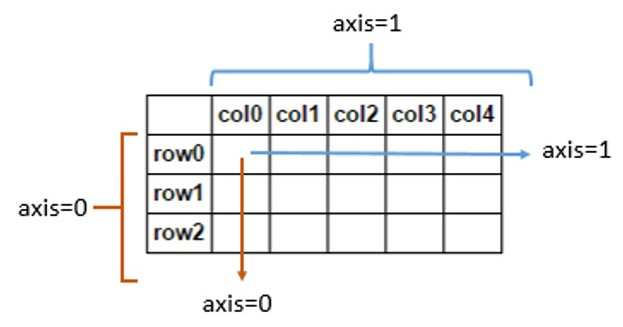

Считаем среднее по строкам (axis = 0) в каждом столбце:

В данном случае среднее было рассчитано по строкам для столбцов population и area.

In [12]:
countries_df.mean(axis=0, numeric_only=True)

population    9.070000e+01
area          5.800860e+06
dtype: float64

Считаем среднее по столбцам (axis = 1) в каждой строке:

Здесь среднее было рассчитано по числовым столбцам для каждой строки в таблице.

In [13]:
countries_df.mean(axis=1, numeric_only=True)

UK      66726.145
CA    4992354.025
US    4913476.140
RU    8562668.620
UA     301836.750
BY     103804.750
KZ    1362459.520
dtype: float64

### Доступ к данным в DataFrame

Можно обратиться к DataFrame по имени столбца через точку:

In [15]:
countries_df.population

UK     56.29
CA     38.05
US    322.28
RU    146.24
UA     45.50
BY      9.50
KZ     17.04
Name: population, dtype: float64

In [ ]:
countries_df['population']

Примечание. Обратите внимание, что, как и ожидалось, при обращении к столбцу DataFrame мы получаем объект Series с именем, соответствующим имени столбца.

При этом, в соответствии с механизмом работы axis, при обращении к DataFrame по индексам с помощью loc (iloc) первым индексом указывается индекс (порядковый номер), соответствующий строкам, а вторым — имя (порядковый номер) столбца.

In [18]:
countries_df.loc['RU', ['population', 'area']]

population      146.24
area          17125191
Name: RU, dtype: object

Сделаем вырезку из таблицы и получим информацию о населении и площади, соответствующую Украине, Беларуси и Казахстану:

In [19]:
countries_df.loc[['UA', 'BY', 'KZ'],['population', 'area']]

,population,area
UA,45.50,603628
BY,9.50,207600
KZ,17.04,2724902


In [43]:
income = [478, 512, 196]
expenses = [156, 130, 270]
years = [2018, 2019, 2020]

def create_companyDF(income, expenses, years):
    result = pd.DataFrame({
            'Income': income,
            'Expenses': expenses,
            },
            index = years)
    return result

# def create_companyDF(income, expenses, years):
#     data = {'Income': income, 'Expenses': expenses}
#     df = pd.DataFrame(data, index=years)
#     return df


def get_profit(df, year):
    if year in df.index:
        return df.loc[year, 'Income'] - df.loc[year, 'Expenses']
    return None

df = create_companyDF(income, expenses, years)
print(get_profit(df, 2019))

382


## Запись в csv-файл

Экспорт данных в формат csv осуществляется с помощью метода DataFrame to_csv().  



### Основные параметры метода DataFrame to_csv()

path_or_buf — путь до файла, в который будет записан DataFrame (например, data/my_data.csv);

sep — разделитель данных в выходном файле (по умолчанию ',');

decimal — разделитель чисел на целую и дробную части в выходном файле (по умолчанию '.');

columns — список столбцов, которые нужно записать в файл (по умолчанию записываются все столбцы);

index — параметр, определяющий, требуется ли создавать дополнительный столбец с индексами строк в файле (по умолчанию True).

Заранее создадим папку data в директории, где лежит наш ноутбук. Теперь давайте сохраним наш DataFrame с информацией о странах в csv-файл countries.csv и положим файл в папку data. При этом укажем, что разделителем в нашем файле будет являться символ ';', а также то, что нам не нужен дополнительный столбец с индексами строк:

In [1]:
import pandas as pd

countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'area': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})

countries_df.to_csv('data/countries.csv', index=False, sep=';')

## Чтение csv-файла

Для чтения таблицы из csv-файла используется функция модуля Pandas read_csv. Функция возвращает DataFrame и имеет несколько важных параметров.

filepath_or_buffer — путь до файла, который мы читаем;

sep — разделитель данных (по умолчанию ',');

decimal — разделитель чисел на целую и дробную часть в выходном файле (по умолчанию '.');

names — список с названиями столбцов для чтения;

skiprows — количество строк в файле, которые нужно пропустить (например, файл может содержать служебную информацию, которая нам не нужна).


Убедимся, что сохранённый нами ранее файл создался верно. Для этого прочитаем его в переменную countries_data и выведем её на экран. Не забудем также о том, что мы использовали в качестве разделителя ';':

In [2]:
countries_data = pd.read_csv('data/countries.csv', sep=';')
display(countries_data)

,country,population,area
0,Англия,56.29,133396
1,Канада,38.05,9984670
2,США,322.28,9826630
3,Россия,146.24,17125191
4,Украина,45.50,603628
5,Беларусь,9.50,207600
6,Казахстан,17.04,2724902


### Чтение csv-файла по ссылке

In [37]:
data = pd.read_csv('https://raw.githubusercontent.com/esabunor/MLWorkspace/master/melb_data.csv')
display(data)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


### Запись и чтение в других форматах

Как уже говорилось ранее, Pandas способен работать со многими распространёнными форматами данных.

Методы для записи таблиц в файлы отличных от csv форматов:

to_excel() — запись DataFrame в формат Excel-таблицы (.xlsx);
to_json() — запись DataFrame в формат JSON (.json);
to_xml() — запись DataFrame в формат XML-документа (.xml);
to_sql() — запись DataFrame в базу данных SQL (для реализации этого метода необходимо установить соединение с базой данных).
Методы для чтения таблиц из файлов в отличных от csv форматах:

read_excel() — чтение из формата Excel-таблицы (.xlsx) в DataFrame;
read_json() — чтение из формата JSON (.json) в DataFrame;
read_xml() — чтение из формата XML-документа (.xml) в DataFrame;
read_sql() — чтение из базы данных SQL в DataFrame (также необходимо установить соединение с базой данных).

### Задачка

In [4]:
melb_data = pd.read_csv('data/melb_data.csv', sep=',')
# count = int(melb_data.loc[3521, ['Landsize']])
# second_count = int(melb_data.loc[1690, ['Landsize']])
print(round(melb_data.loc[3521, ['Landsize']] / melb_data.loc[1690, ['Landsize']]))

Landsize    2.785714
dtype: object


### Вывод первых и последних строк

Для этого у DataFrame есть методы head() и tail(), которые возвращают n первых и n последних строк таблицы соответственно (по умолчанию n = 5).

Выведем первые пять строк нашей таблицы:

In [40]:
display(melb_data.head())
display(melb_data.tail())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Размерность таблицы

Далее хотелось бы узнать размер таблицы — количество строк и количество столбцов. Это можно сделать с помощью атрибута shape, который возвращает кортеж с количеством строк и столбцов:

In [41]:
melb_data.shape

(13580, 21)

### Получение информации о столбцах

Для того чтобы получить более детальную информацию о столбцах таблицы, можно использовать метод DataFrame info():

In [35]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Изменение типа данных в столбце

→ Если присмотреться внимательнее к выводу метода info(), а конкретнее — к типам данных столбцов, становится понятно, что некоторые признаки кодируются не совсем корректными типами данных. 

Чтобы исправить это, можно воспользоваться методом astype(), который позволяет преобразовать тип данных столбца:

In [ ]:
#melb_data['Car'] = melb_data['Car'].astype('int64')
melb_data['Bedroom2'] = melb_data['Bedroom2'].astype('int64')
melb_data['Bathroom'] = melb_data['Bathroom'].astype('int64')
melb_data['Propertycount'] = melb_data['Propertycount'].astype('int64')
melb_data['YearBuilt'] = melb_data['YearBuilt'].astype('int64')
melb_data.info()

###  Получение описательной статистики

→ Часто при работе с таблицей нужно быстро посмотреть на основные статистические свойства её столбцов. Для этого можно воспользоваться методом DataFrame describe().

По умолчанию метод работает с числовыми (int64 и float64) столбцами и показывает число непустых значений (count), среднее (mean), стандартное отклонение (std), минимальное значение (min),  квантили уровней 0.25, 0.5 (медиана) и 0.75 (25%, 50%, 75%) и максимальное значение (max) для каждого столбца исходной таблицы.

In [50]:
melb_data.describe().loc[:, ['Distance', 'BuildingArea' , 'Price']]


,Distance,BuildingArea,Price
count,13580.000000,7130.000000,1.358000e+04
mean,10.137776,151.967650,1.075684e+06
std,5.868725,541.014538,6.393107e+05
min,0.000000,0.000000,8.500000e+04
25%,6.100000,93.000000,6.500000e+05
50%,9.200000,126.000000,9.030000e+05
75%,13.000000,174.000000,1.330000e+06
max,48.100000,44515.000000,9.000000e+06


→ На самом деле метод describe() можно применять не только к числовым признакам. С помощью параметра include можно указать тип данных, для которого нужно вывести описательную информацию.

Например, для типа данных object метод describe() возвращает DataFrame, в котором указаны:

количество непустых строк (count);

количество уникальных значений (unique);

самое частое значение — мода —  (top);

частота — объём использования — этого значения (freq) для каждого столбца типа object исходной таблицы.

In [51]:
melb_data.describe(include=['object'])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


### Получение частоты уникальных значений в столбце

→ Для того чтобы определить, сколько раз в столбце повторяется каждый из вариантов значений (т.е. найти частоту для каждого уникального знания), используется метод value_counts().


In [52]:
melb_data['Regionname'].value_counts()

Regionname
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: count, dtype: int64

Чтобы сделать вывод более интерпретируемым и понятным, можно воспользоваться параметром normalize. При установке значения этого параметра на True результат будет представляться в виде доли (относительной частоты):

In [53]:
melb_data['Regionname'].value_counts(normalize=True)

Regionname
Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217084
Eastern Metropolitan          0.108321
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.003903
Northern Victoria             0.003019
Western Victoria              0.002356
Name: proportion, dtype: float64

In [72]:
melb_data['CouncilArea'].describe()

count        12211
unique          33
top       Moreland
freq          1163
Name: CouncilArea, dtype: object

## Агрегирующие методы

Агрегирующим в Pandas называется метод, который для каждого столбца возвращает только одно значение — показатель (например, вычисление медианы, максимума, среднего и так далее).

Метод	Статистический параметр

.count()	Количество непустых значений

.mean()	Среднее значение

.min()	Минимальное значение

.max()	Максимальное значение

.var()	Дисперсия

.std()	Стандартное отклонение

.sum()	Сумма

.quantile(x)	Квантиль уровня x

.nunique()	Число уникальных значений


Вычислим среднюю цену на объекты недвижимости:

In [5]:
print(melb_data['Price'].mean())

1075684.079455081


А теперь представим, что риэлторская ставка для всех компаний за продажу недвижимости составляет 12%. Найдём общую прибыльность риэлторского бизнеса в Мельбурне. Результат округлим до сотых:

In [6]:
rate = 0.12
income = melb_data['Price'].sum() * rate
print('Total income of real estate agencies:', round(income, 2))

Total income of real estate agencies: 1752934775.88


Найдём, насколько медианная площадь территории отличается от её среднего значения. Вычислим модуль разницы между медианой и средним и разделим результат на среднее, чтобы получить отклонение в долях:

In [8]:
landsize_median = melb_data['Landsize'].median() 
landsize_mean =  melb_data['Landsize'].mean()
print(abs(landsize_median - landsize_mean)/landsize_mean)

0.21205713983546193


В результате получаем долю отклонения медианы от среднего значения. Умножив результат на 100, получим его в процентах. Отклонение медианы от среднего значения на 21% является довольно большим, и это повод задуматься над тем, чтобы исследовать признак на наличие аномалий. 

### Модальное значение

→ Отдельный интерес представляет статический показатель моды — самого распространённого значения в столбце. Он вычисляется с помощью метода mode().

Модальных значений может быть несколько, то есть несколько значений могут встречаться одинаковое количество раз. Поэтому метод mode(), в отличие от агрегирующих методов, возвращает не одно число, а серию.

### Фильтрация данных в DataFrame

Под фильтрацией в DataFrame подразумевается получение новой таблицы путём вырезания строк, не удовлетворяющих поставленному условию.

Маской называется Series, которая состоит из булевых значений, при этом значения True соответствуют тем индексам, для которых заданное условие выполняется, в противном случае ставится значение False (например, цена > 2 млн).

Создадим маску и положим её в переменную с именем mask. Синтаксис очень прост:

In [22]:
mask = melb_data['Price'] > 2000000
display(mask)

0        False
1        False
2        False
3        False
4        False
         ...  
13575    False
13576    False
13577    False
13578     True
13579    False
Name: Price, Length: 13580, dtype: bool

Для фильтрации нужно просто подставить переменную mask в индексацию DataFrame. Маска показывает, какие строки нужно оставлять в результирующем наборе, а какие — убирать (выведем первые пять строк отфильтрованной таблицы):

In [23]:
display(melb_data[mask].head())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,4/03/2017,3.3,3206.0,...,2.0,0.0,211.0,198.0,1890.0,Port Phillip,-37.8481,144.9499,Southern Metropolitan,3280.0
85,Albert Park,104 Richardson St,4,h,2300000.0,S,Marshall,7/05/2016,3.3,3206.0,...,2.0,1.0,153.0,180.0,1880.0,Port Phillip,-37.8447,144.9523,Southern Metropolitan,3280.0
88,Albert Park,29 Faussett St,2,h,2120000.0,S,Greg,10/09/2016,3.3,3206.0,...,1.0,1.0,199.0,107.0,1900.0,Port Phillip,-37.8422,144.9554,Southern Metropolitan,3280.0
92,Albert Park,2 Dundas Pl,3,h,2615000.0,S,Cayzer,10/12/2016,3.3,3206.0,...,2.0,1.0,177.0,181.0,1880.0,Port Phillip,-37.8415,144.9585,Southern Metropolitan,3280.0
93,Albert Park,23 Finlay St,5,h,2100000.0,S,Greg,10/12/2016,3.3,3206.0,...,2.0,1.0,237.0,NaN,NaN,Port Phillip,-37.8436,144.9557,Southern Metropolitan,3280.0


Найдём количество зданий с тремя комнатами. Для этого отфильтруем таблицу по условию: обратимся к результирующей таблице по столбцу Rooms и найдём число строк в ней с помощью атрибута shape:

In [24]:
melb_data[melb_data['Rooms'] == 3].shape[0]

5881

Условия можно комбинировать, используя операторы & (логическое И) и | (логическое ИЛИ). Условия при этом заключаются в скобки.

Усложним прошлый пример и найдём число трёхкомнатных домов с ценой менее 300 тысяч:

In [25]:
melb_data[(melb_data['Rooms'] == 3) & (melb_data['Price'] < 300000)].shape[0]

3

Таких зданий оказалось всего три. Немного «ослабим» условие: теперь нас будут интересовать дома с ценой менее 300 тысяч, у которых либо число комнат равно 3 либо площадь домов более 100 квадратных метров:

In [26]:
melb_data[((melb_data['Rooms'] == 3) | (melb_data['BuildingArea'] > 100)) & (melb_data['Price'] < 300000)].shape[0]

7

In [37]:
melb_data[(melb_data['Type'] == 'h') & (melb_data['Price'] < 3000000)]['Suburb'].max()

'Yarraville'

## Задание

In [6]:
import pandas as pd


students_data = pd.read_csv('data/students_performance.csv', sep=',')
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [86]:
# countries_df.loc['RU', ['population', 'area']]
# students_data[(students_data['test preparation course'] == 'completed')]['reading score'].mean()
# students_data[(students_data['math score'] == 0)]
# students_data[(students_data['lunch'] == 'free/reduced')]['math score'].mean()
# students_data[(students_data['lunch'] == 'standard')]['math score'].mean()
# students_data[(students_data['parental level of education'] == "bachelor's degree")]
students_data.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000
